In [ ]:
#Import Python packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data & preprocessing

In [ ]:
#import file 
data = pd.read_csv('final_data.csv', encoding = "ISO-8859-1")
# data

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'date', 'country/region', 'y/cases',
       'y_cases_increasing_rate', 'y/death', 'y_cases_increasing_rate.1',
       'population', 'GDPPC', '%_ages_0-14  ', '%_ages_15-64  ', '%_ages_65+',
       'temperature', 'C1_School closing', 'C1_Flag', 'C1_Notes',
       'C2_Workplace closing', 'C2_Flag', 'C2_Notes',
       'C3_Cancel public events', 'C3_Flag', 'C3_Notes',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes',
       'C5_Close public transport', 'C5_Flag', 'C5_Notes',
       'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes',
       'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes',
       'C8_International travel controls', 'C8_Notes', 'E1_Income support',
       'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes',
       'E3_Fiscal measures', 'E3_Notes', 'E4_International support',
       'E4_Notes', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes',
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_N

In [ ]:
X_case = data[['population', 'GDPPC', '%_ages_0-14  ', '%_ages_15-64  ', '%_ages_65+', 'temperature', 'C1_School closing',
          'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 
          'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
          'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures',
          'E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare',
          'H5_Investment in vaccines', 'H6_Facial Coverings', 'StringencyIndexForDisplay',
          'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay',
          'EconomicSupportIndexForDisplay', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
          'Generosity', 'Perceptions of corruption', 'cases_1_day_before', 'cases_2_day_before', 'cases_3_day_before',
          'cases_4_day_before', 'cases_5_day_before']]
y_case = data[['y/cases']]

In [ ]:
#standardize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc.fit(X_case)
X_standardized = sc.transform(X_case)
X_standardized = pd.DataFrame(X_standardized)
sc.fit(y_case)
y_standardized = sc.transform(y_case)
y_standardized = pd.DataFrame(y_standardized)
y_standardized.fillna(y_standardized.mean())

,0
0,0.868836
1,0.887476
2,0.803711
3,0.895253
4,1.000000
...,...
2305,0.003891
2306,0.003891
2307,0.003891
2308,0.003891


In [ ]:
#train_test split
from sklearn.model_selection import train_test_split
X_train_all, X_validate_all, y_train_all, y_validate_all = train_test_split(X_standardized, y_standardized, test_size = 0.25)
#X_train
#y_train

# Adding the previous cases directly to the dataset as parameters. Naive method. Used as baseline.

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train_all, y_train_all)
y_train_predicted = model.predict(X_train_all)
y_predicted = model.predict(X_validate_all)
mae_lm_train = np.sum(np.absolute(y_train_predicted-y_train_all))/len(y_train_all)
mae_lm = np.sum(np.absolute(y_predicted-y_validate_all))/len(y_validate_all)
print("training error:", mae_lm_train)
print("validate error:", mae_lm)


training error: 0    0.011083
dtype: float64
validate error: 0    0.013065
dtype: float64


In [ ]:
# use regularization

from sklearn.linear_model import Ridge
clf = Ridge(alpha=5)
clf.fit(X_train_all,y_train_all)
y_pred_ridge = clf.predict(X_validate_all)
y_pred_ridge_train = model.predict(X_train_all)
mae_ridge = np.sum(np.absolute(y_pred_ridge-y_validate_all))/len(y_validate_all)
mae_ridge_train = np.sum(np.absolute(y_pred_ridge_train-y_train_all))/len(y_train_all)
print("training error:", mae_ridge_train)
print("validate error:", mae_ridge)

training error: 0    0.011398
dtype: float64
validate error: 0    0.016067
dtype: float64


[[-9.42245100e-01 -6.35885869e-01  4.70545243e-01 ...  7.37216646e-02
  -5.14552242e-02  4.63196164e-02]
 [-9.41288656e-01 -6.36104528e-01  4.69371806e-01 ...  7.54239779e-02
  -4.83353206e-02  2.13653849e-02]
 [-9.40612272e-01 -6.36401215e-01  4.68617078e-01 ...  7.99687079e-02
  -4.06249995e-02 -4.41555020e-02]
 ...
 [ 2.80543128e+00 -1.80073087e-01 -4.79074690e-01 ...  1.20440088e-03
   8.64344636e-02  5.87900251e-03]
 [ 2.80543128e+00 -1.80073087e-01 -4.79074690e-01 ...  1.20440088e-03
   8.64344636e-02  5.87900251e-03]
 [ 2.80543128e+00 -1.80073087e-01 -4.79074690e-01 ...  1.20440088e-03
   8.64344636e-02  5.87900251e-03]]
[4.14720514e-01 2.13479774e-01 7.74472088e-02 6.32426904e-02
 4.22501001e-02 3.84293262e-02 2.59286824e-02 1.84152258e-02
 1.75510158e-02 1.53065265e-02 1.27581854e-02 9.20721623e-03
 8.66453462e-03 7.87162376e-03 6.61597385e-03 6.14118436e-03
 5.53591485e-03 4.30573021e-03 3.11523084e-03 2.85937220e-03
 2.35164209e-03 1.53777259e-03 5.85229364e-04 3.50973931e-0

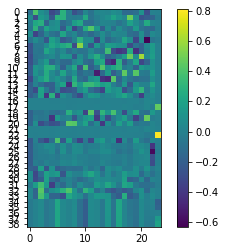

In [ ]:
#inplement PCA to do feature selection
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
X_pca = pca.fit_transform(X_standardized)
print(X_pca)
print(pca.explained_variance_ratio_)
components = pca.components_
#print(components)
a,b = plt.subplots()
plt.imshow(components.T)
plt.yticks(range(len(X_standardized.columns)),X_standardized.columns)
plt.colorbar()

In [ ]:
# train_test split
from sklearn.model_selection import train_test_split
X_train_pca, X_validate_pca, y_train_pca, y_validate_pca = train_test_split(X_pca, y_standardized, test_size = 0.25)
# X_train
# y_train

In [ ]:
#KNN for regression

from sklearn.neighbors import KNeighborsRegressor
k = 7
knn = KNeighborsRegressor(k)
knn.fit(X_train_pca,y_train_pca)
y_pred_knn_train = knn.predict(X_train_pca)
y_pred_knn = knn.predict(X_validate_pca)
mae_knn_train = np.sum(np.absolute(y_pred_knn_train-y_train_pca))/len(y_train_pca)
mae_knn = np.sum(np.absolute(y_pred_knn-y_validate_pca))/len(y_validate_pca)
print("training error:", mae_knn_train)
print("validate error:", mae_knn)

training error: 0    0.009789
dtype: float64
validate error: 0    0.013385
dtype: float64


In [ ]:
# random forest for regression
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=25)
rfr.fit(X_train_pca,y_train_pca)
y_pred_rfr = rfr.predict(X_validate_pca)
y_pred_rfr = pd.DataFrame(y_pred_rfr)
y_pred_rfr_train = rfr.predict(X_train_pca)
y_pred_rfr_train = pd.DataFrame(y_pred_rfr_train)
mae_rfr = np.sum(np.absolute(y_pred_rfr-y_validate_pca))/len(y_validate_pca)
mae_rfr_train = np.sum(np.absolute(y_pred_rfr_train-y_train_pca))/len(y_train_pca)
print("training error:", mae_rfr_train)
print("validate error:", mae_rfr)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


training error: 0    0.085798
dtype: float64
validate error: 0    0.044153
dtype: float64


In [ ]:
# Regression Tree for Regression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train_all, y_train_all)
regr_2.fit(X_train_pca, y_train_pca)

# Predict
y_pred_tree1 = regr_1.predict(X_validate_all)
y_pred_tree2 = regr_2.predict(X_validate_pca)

y_pred_1 = np.reshape(y_pred_tree1, (578, 1))
y_pred_2 = np.reshape(y_pred_tree2, (578, 1))
# Calculate MAE
mae_tree1 = np.sum(np.absolute(y_pred_1-y_validate_all))/len(y_validate_all)
print(mae_tree1)
mae_tree2 = np.sum(np.absolute(y_pred_2-y_validate_pca))/len(y_validate_pca)
print(mae_tree2)

# Plot the results
# plt.figure()
# plt.scatter(X_standardized, y_standardized, s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

0    0.014959
dtype: float64
0    0.016023
dtype: float64


the best model: knn, with its mean absolute error == 0.0113. This is the naive prediction and it is counted as baseline.

# multi-layer LSTM with single feature


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
us_data = pd.read_csv('LSTM_data - US.csv')
cn_data = pd.read_csv('LSTM_data - China.csv')
fr_data = pd.read_csv('LSTM_data - France.csv')
br_data = pd.read_csv('LSTM_data - Brazil.csv')
in_data = pd.read_csv('LSTM_data - India.csv')
it_data = pd.read_csv('LSTM_data - Italy.csv')
uk_data = pd.read_csv('LSTM_data - UK.csv')
data = [us_data, cn_data, fr_data, br_data, in_data, it_data, uk_data]
name_lst = ['US', 'China', 'France', 'Brazil', 'India', 'Italy', 'UK']

In [ ]:
mae_lst = []
for national_data, nation_name in zip(data, name_lst):
  #scale the data
  selected = national_data[['y/cases']]
  sc = MinMaxScaler(feature_range = (0, 1))
  scaled = sc.fit_transform(selected)

  #train test split
  train = scaled[0:250]
  validate = scaled[250:330]
  train_X = []
  train_y = []
  validate_X = []
  validate_y = []
  for i in range(239):
    one_train_X = train[i:i+9]
    one_train_y = train[i+10]
    train_X.append(one_train_X)
    train_y.append(one_train_y)
  for a in range(69):
    one_validate_X = train[a:a+9]
    one_validate_y = train[a+10]
    validate_X.append(one_validate_X)
    validate_y.append(one_validate_y)
  train_X, train_y, validate_X, validate_y = np.array(train_X), np.array(train_y), np.array(validate_X), np.array(validate_y)
  train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
  validate_X = np.reshape(validate_X, (validate_X.shape[0], validate_X.shape[1], 1))

  #LSTM model
  regressor = Sequential()
  regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (train_X.shape[1], 1)))
  regressor.add(Dropout(0.5))
  regressor.add(LSTM(units = 10, return_sequences = True))
  regressor.add(Dropout(0.5))
  regressor.add(LSTM(units = 10))
  regressor.add(Dropout(0.3))
  regressor.add(Dense(units = 1))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.summary()
  regressor.fit(train_X, train_y, epochs = 15 , batch_size = 40)

  #make prediction and calculate mae
  y_pred_lstm = regressor.predict(validate_X)
  mae_lstm = np.sum(np.absolute(y_pred_lstm - validate_y))/len(validate_y)
  mae_lst.append(mae_lstm)
  print(mae_lstm, nation_name)

for each, nation_name in zip(mae_lst, name_lst):
  print(each, nation_name)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 10)             480       
_________________________________________________________________
dropout (Dropout)            (None, 9, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

# single-layer LSTM with multi features

No handles with labels found to put in legend.


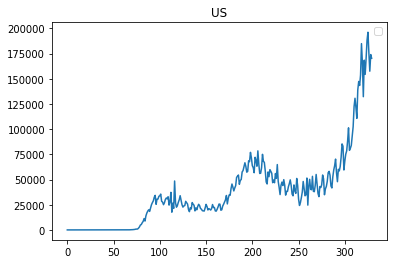

No handles with labels found to put in legend.


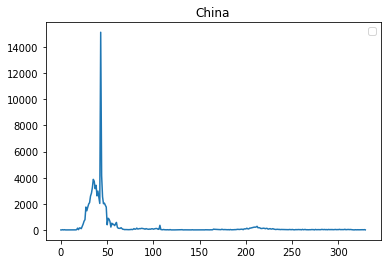

No handles with labels found to put in legend.


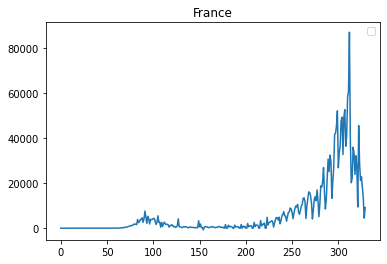

No handles with labels found to put in legend.


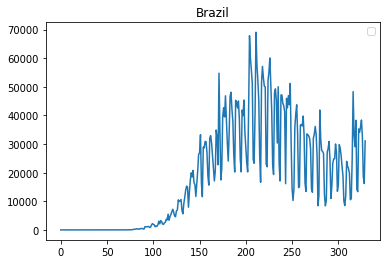

No handles with labels found to put in legend.


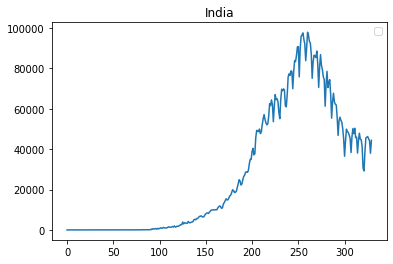

No handles with labels found to put in legend.


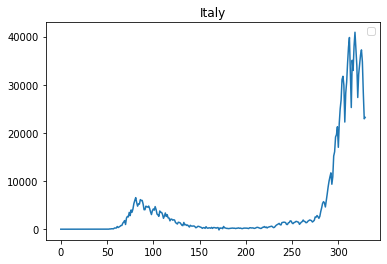

No handles with labels found to put in legend.


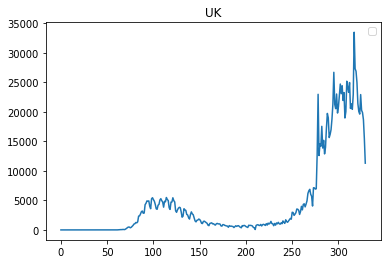

In [ ]:
first_selected_data = []
name_lst = ['US', 'China', 'France', 'Brazil', 'India', 'Italy', 'UK']
for i in range(len(data)):
  m = data[i][['population', 'GDPPC', '%_ages_0-14  ', '%_ages_15-64  ', '%_ages_65+', 'temperature', 'C1_School closing',
          'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 
          'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
          'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures',
          'E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare',
          'H5_Investment in vaccines', 'H6_Facial Coverings', 'StringencyIndexForDisplay',
          'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay',
          'EconomicSupportIndexForDisplay', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
            'Generosity', 'Perceptions of corruption', 'y/cases']]
  
  first_selected_data.append(m)
  m_df = pd.DataFrame(m)
  pyplot.plot(m_df[['y/cases']])
  pyplot.title(name_lst[i])
  pyplot.legend()
  pyplot.show()



In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

try different LSTM settings for each country.

(240, 1, 69) (240,) (56, 1, 69) (56,)
Epoch 1/250
4/4 - 2s - loss: 0.2262 - val_loss: 0.4961
Epoch 2/250
4/4 - 0s - loss: 0.0767 - val_loss: 0.2923
Epoch 3/250
4/4 - 0s - loss: 0.0867 - val_loss: 0.2164
Epoch 4/250
4/4 - 0s - loss: 0.1118 - val_loss: 0.2249
Epoch 5/250
4/4 - 0s - loss: 0.0897 - val_loss: 0.2750
Epoch 6/250
4/4 - 0s - loss: 0.0686 - val_loss: 0.3324
Epoch 7/250
4/4 - 0s - loss: 0.0566 - val_loss: 0.3595
Epoch 8/250
4/4 - 0s - loss: 0.0520 - val_loss: 0.3499
Epoch 9/250
4/4 - 0s - loss: 0.0479 - val_loss: 0.3198
Epoch 10/250
4/4 - 0s - loss: 0.0488 - val_loss: 0.2914
Epoch 11/250
4/4 - 0s - loss: 0.0528 - val_loss: 0.2754
Epoch 12/250
4/4 - 0s - loss: 0.0545 - val_loss: 0.2760
Epoch 13/250
4/4 - 0s - loss: 0.0517 - val_loss: 0.2884
Epoch 14/250
4/4 - 0s - loss: 0.0479 - val_loss: 0.2998
Epoch 15/250
4/4 - 0s - loss: 0.0447 - val_loss: 0.3010
Epoch 16/250
4/4 - 0s - loss: 0.0431 - val_loss: 0.2949
Epoch 17/250
4/4 - 0s - loss: 0.0422 - val_loss: 0.2874
Epoch 18/250
4/4 - 

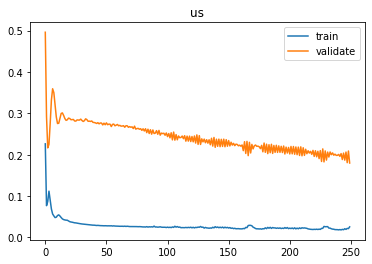

us: 13.145282868526445


In [ ]:
#us

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[0])
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(30, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=250, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('us')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("us:", mse)

(240, 1, 69) (240,) (89, 1, 69) (89,)
Epoch 1/250
4/4 - 2s - loss: 0.0780 - val_loss: 0.0840
Epoch 2/250
4/4 - 0s - loss: 0.0985 - val_loss: 0.0933
Epoch 3/250
4/4 - 0s - loss: 0.0493 - val_loss: 0.0282
Epoch 4/250
4/4 - 0s - loss: 0.0386 - val_loss: 0.0625
Epoch 5/250
4/4 - 0s - loss: 0.0571 - val_loss: 0.0939
Epoch 6/250
4/4 - 0s - loss: 0.0435 - val_loss: 0.0302
Epoch 7/250
4/4 - 0s - loss: 0.0569 - val_loss: 0.0258
Epoch 8/250
4/4 - 0s - loss: 0.0424 - val_loss: 0.0485
Epoch 9/250
4/4 - 0s - loss: 0.0389 - val_loss: 0.0534
Epoch 10/250
4/4 - 0s - loss: 0.0254 - val_loss: 0.0301
Epoch 11/250
4/4 - 0s - loss: 0.0244 - val_loss: 0.0322
Epoch 12/250
4/4 - 0s - loss: 0.0237 - val_loss: 0.0384
Epoch 13/250
4/4 - 0s - loss: 0.0251 - val_loss: 0.0241
Epoch 14/250
4/4 - 0s - loss: 0.0375 - val_loss: 0.0223
Epoch 15/250
4/4 - 0s - loss: 0.0217 - val_loss: 0.0302
Epoch 16/250
4/4 - 0s - loss: 0.0250 - val_loss: 0.0317
Epoch 17/250
4/4 - 0s - loss: 0.0271 - val_loss: 0.0244
Epoch 18/250
4/4 - 

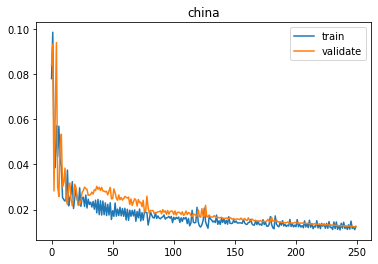

china: 1.126312659158562


In [ ]:
#china

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[1]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=250, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('china')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("china:", mse)

(240, 1, 69) (240,) (89, 1, 69) (89,)
Epoch 1/250
4/4 - 2s - loss: 0.0236 - val_loss: 0.2131
Epoch 2/250
4/4 - 0s - loss: 0.0404 - val_loss: 0.2085
Epoch 3/250
4/4 - 0s - loss: 0.0274 - val_loss: 0.2341
Epoch 4/250
4/4 - 0s - loss: 0.0218 - val_loss: 0.2359
Epoch 5/250
4/4 - 0s - loss: 0.0207 - val_loss: 0.2158
Epoch 6/250
4/4 - 0s - loss: 0.0210 - val_loss: 0.2096
Epoch 7/250
4/4 - 0s - loss: 0.0190 - val_loss: 0.2172
Epoch 8/250
4/4 - 0s - loss: 0.0180 - val_loss: 0.2190
Epoch 9/250
4/4 - 0s - loss: 0.0169 - val_loss: 0.2151
Epoch 10/250
4/4 - 0s - loss: 0.0159 - val_loss: 0.2161
Epoch 11/250
4/4 - 0s - loss: 0.0147 - val_loss: 0.2213
Epoch 12/250
4/4 - 0s - loss: 0.0138 - val_loss: 0.2190
Epoch 13/250
4/4 - 0s - loss: 0.0130 - val_loss: 0.2173
Epoch 14/250
4/4 - 0s - loss: 0.0121 - val_loss: 0.2193
Epoch 15/250
4/4 - 0s - loss: 0.0117 - val_loss: 0.2153
Epoch 16/250
4/4 - 0s - loss: 0.0115 - val_loss: 0.2164
Epoch 17/250
4/4 - 0s - loss: 0.0108 - val_loss: 0.2153
Epoch 18/250
4/4 - 

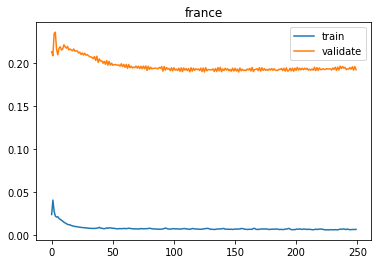

france: 17.238678252584467


In [ ]:
#France

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[2]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(8, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=250, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('france')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("france:", mse)

(240, 1, 69) (240,) (89, 1, 69) (89,)
Epoch 1/100
4/4 - 2s - loss: 0.3037 - val_loss: 0.3681
Epoch 2/100
4/4 - 0s - loss: 0.1841 - val_loss: 0.1947
Epoch 3/100
4/4 - 0s - loss: 0.1624 - val_loss: 0.1409
Epoch 4/100
4/4 - 0s - loss: 0.1790 - val_loss: 0.1306
Epoch 5/100
4/4 - 0s - loss: 0.1935 - val_loss: 0.1319
Epoch 6/100
4/4 - 0s - loss: 0.1915 - val_loss: 0.1299
Epoch 7/100
4/4 - 0s - loss: 0.1812 - val_loss: 0.1305
Epoch 8/100
4/4 - 0s - loss: 0.1720 - val_loss: 0.1351
Epoch 9/100
4/4 - 0s - loss: 0.1643 - val_loss: 0.1409
Epoch 10/100
4/4 - 0s - loss: 0.1583 - val_loss: 0.1456
Epoch 11/100
4/4 - 0s - loss: 0.1529 - val_loss: 0.1475
Epoch 12/100
4/4 - 0s - loss: 0.1482 - val_loss: 0.1473
Epoch 13/100
4/4 - 0s - loss: 0.1445 - val_loss: 0.1455
Epoch 14/100
4/4 - 0s - loss: 0.1412 - val_loss: 0.1436
Epoch 15/100
4/4 - 0s - loss: 0.1381 - val_loss: 0.1421
Epoch 16/100
4/4 - 0s - loss: 0.1352 - val_loss: 0.1424
Epoch 17/100
4/4 - 0s - loss: 0.1310 - val_loss: 0.1423
Epoch 18/100
4/4 - 

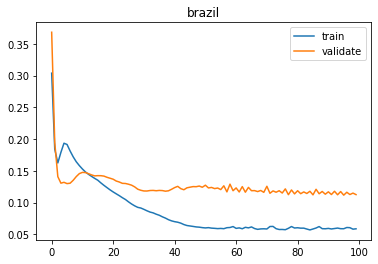

brazil: 13.424075335104614


In [ ]:
#brazil

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[3]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(30, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=100, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('brazil')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("brazil:", mse)

(240, 1, 69) (240,) (84, 1, 69) (84,)
Epoch 1/100
4/4 - 2s - loss: 0.1787 - val_loss: 0.7181
Epoch 2/100
4/4 - 0s - loss: 0.1332 - val_loss: 0.6318
Epoch 3/100
4/4 - 0s - loss: 0.1365 - val_loss: 0.5690
Epoch 4/100
4/4 - 0s - loss: 0.1481 - val_loss: 0.5400
Epoch 5/100
4/4 - 0s - loss: 0.1504 - val_loss: 0.5330
Epoch 6/100
4/4 - 0s - loss: 0.1457 - val_loss: 0.5391
Epoch 7/100
4/4 - 0s - loss: 0.1369 - val_loss: 0.5517
Epoch 8/100
4/4 - 0s - loss: 0.1268 - val_loss: 0.5642
Epoch 9/100
4/4 - 0s - loss: 0.1200 - val_loss: 0.5639
Epoch 10/100
4/4 - 0s - loss: 0.1152 - val_loss: 0.5518
Epoch 11/100
4/4 - 0s - loss: 0.1118 - val_loss: 0.5337
Epoch 12/100
4/4 - 0s - loss: 0.1097 - val_loss: 0.5164
Epoch 13/100
4/4 - 0s - loss: 0.1072 - val_loss: 0.5099
Epoch 14/100
4/4 - 0s - loss: 0.1028 - val_loss: 0.5108
Epoch 15/100
4/4 - 0s - loss: 0.0967 - val_loss: 0.5048
Epoch 16/100
4/4 - 0s - loss: 0.0923 - val_loss: 0.4929
Epoch 17/100
4/4 - 0s - loss: 0.0889 - val_loss: 0.4804
Epoch 18/100
4/4 - 

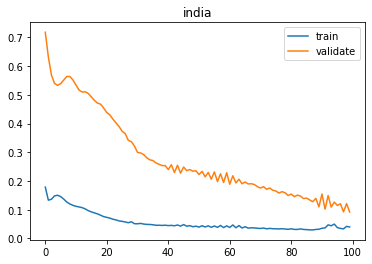

india: 17.285642535172435


In [ ]:
#india

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[4]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=100, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('india')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("india:", mse)

(240, 1, 69) (240,) (89, 1, 69) (89,)
Epoch 1/150
4/4 - 2s - loss: 0.1917 - val_loss: 0.3645
Epoch 2/150
4/4 - 0s - loss: 0.0581 - val_loss: 0.2619
Epoch 3/150
4/4 - 0s - loss: 0.0457 - val_loss: 0.2541
Epoch 4/150
4/4 - 0s - loss: 0.0321 - val_loss: 0.2677
Epoch 5/150
4/4 - 0s - loss: 0.0288 - val_loss: 0.2730
Epoch 6/150
4/4 - 0s - loss: 0.0209 - val_loss: 0.2495
Epoch 7/150
4/4 - 0s - loss: 0.0256 - val_loss: 0.2475
Epoch 8/150
4/4 - 0s - loss: 0.0215 - val_loss: 0.2614
Epoch 9/150
4/4 - 0s - loss: 0.0183 - val_loss: 0.2570
Epoch 10/150
4/4 - 0s - loss: 0.0184 - val_loss: 0.2480
Epoch 11/150
4/4 - 0s - loss: 0.0192 - val_loss: 0.2506
Epoch 12/150
4/4 - 0s - loss: 0.0171 - val_loss: 0.2556
Epoch 13/150
4/4 - 0s - loss: 0.0162 - val_loss: 0.2479
Epoch 14/150
4/4 - 0s - loss: 0.0166 - val_loss: 0.2463
Epoch 15/150
4/4 - 0s - loss: 0.0147 - val_loss: 0.2523
Epoch 16/150
4/4 - 0s - loss: 0.0142 - val_loss: 0.2438
Epoch 17/150
4/4 - 0s - loss: 0.0157 - val_loss: 0.2461
Epoch 18/150
4/4 - 

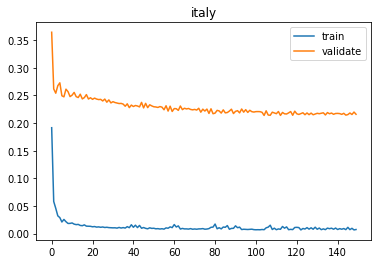

italy 25.601281121095642


In [ ]:
#italy

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[5]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(30, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=150, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('italy')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("italy", mse)

(240, 1, 69) (240,) (78, 1, 69) (78,)
Epoch 1/250
4/4 - 2s - loss: 0.1866 - val_loss: 0.2635
Epoch 2/250
4/4 - 0s - loss: 0.1250 - val_loss: 0.2917
Epoch 3/250
4/4 - 0s - loss: 0.0735 - val_loss: 0.3338
Epoch 4/250
4/4 - 0s - loss: 0.0528 - val_loss: 0.3821
Epoch 5/250
4/4 - 0s - loss: 0.0633 - val_loss: 0.3950
Epoch 6/250
4/4 - 0s - loss: 0.0595 - val_loss: 0.3794
Epoch 7/250
4/4 - 0s - loss: 0.0515 - val_loss: 0.3596
Epoch 8/250
4/4 - 0s - loss: 0.0482 - val_loss: 0.3549
Epoch 9/250
4/4 - 0s - loss: 0.0436 - val_loss: 0.3614
Epoch 10/250
4/4 - 0s - loss: 0.0392 - val_loss: 0.3703
Epoch 11/250
4/4 - 0s - loss: 0.0378 - val_loss: 0.3674
Epoch 12/250
4/4 - 0s - loss: 0.0358 - val_loss: 0.3587
Epoch 13/250
4/4 - 0s - loss: 0.0349 - val_loss: 0.3574
Epoch 14/250
4/4 - 0s - loss: 0.0320 - val_loss: 0.3634
Epoch 15/250
4/4 - 0s - loss: 0.0306 - val_loss: 0.3628
Epoch 16/250
4/4 - 0s - loss: 0.0297 - val_loss: 0.3579
Epoch 17/250
4/4 - 0s - loss: 0.0291 - val_loss: 0.3566
Epoch 18/250
4/4 - 

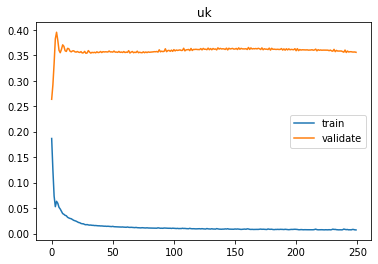

uk: 28.21300314238981


In [ ]:
#uk

#scale
import pandas as pd
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(first_selected_data[6]) #改这里就行
reframed = series_to_supervised(scaled, 1, 1)
scaled_df = pd.DataFrame(scaled)

#train-test split
values = reframed.values
n_train_hours = 10 * 24
train = values[:n_train_hours, :]
validate = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
validate_X2, validate_y2 = validate[:, :-1], validate[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validate_X2 = validate_X2.reshape((validate_X2.shape[0], 1, validate_X2.shape[1]))
print(train_X2.shape, train_y2.shape, validate_X2.shape, validate_y2.shape)

#model & prediction
model = Sequential()
model.add(LSTM(10, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X2, train_y2, epochs=250, batch_size=72, validation_data=(validate_X2, validate_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.title('uk')
pyplot.legend()
pyplot.show()
# predict
yhat = model.predict(validate_X2)
mse = np.sum(np.absolute(yhat - validate_y2))/len(validate_y2)
print("uk:", mse)